In [42]:
import pandas as pd
from googletrans import Translator
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [44]:
import spacy
nlp = spacy.load('en_core_web_sm')


In [45]:
df= pd.DataFrame()
test= pd.DataFrame()

In [46]:
translated_data= pd.read_csv("translated data.csv")
translated_test = pd.read_csv("translated test.csv")


df= translated_data.copy()
test= translated_test.copy()

print(df.head())
print(test.head()) 

                                               hindi  \
0  सोनीपत में दो बच्चों पांच साल के लड़के और दो स...   
1  पंचकुला में जहां शादी की पूर्व संध्या पर दुल्ह...   
2  सोनीपत से अपने रिश्तेदार के सात वर्षीय बच्चे क...   
3  थानेसर मे शादी के महज छह महीने बाद ही एक नवविव...   
4  मवार को डकैती के मामलों में वांछित दो लोगों को...   

                                           complaint category  
0  Two children, a five-year-old boy and a two-ye...   kidnap  
1  In Panchkula, where the bride's neighbor alleg...   murder  
2  After kidnapping a seven-year-old child of his...   kidnap  
3  Just six months after marriage in Thanesar, a ...   murder  
4  Mawar has arrested two people wanted in robber...    theft  
                                               hindi  \
0  करनाल के एक रेस्टोरेंट में अनजान व्यक्तियों ने...   
1  अम्बाला के एक नगर निगम कर्मचारी को उनके आवास क...   
2  सोनीपत में एक युवक अपनी प्रेमिका से मिलने पहुं...   
3  हिसार में एक दलित व्यक्ति को उसके घर पर हत्या ...   

In [47]:
df.isna().sum()


hindi        0
complaint    0
category     0
dtype: int64

In [48]:
import re

def clean_string(text):
    cleaned_text = re.sub(r"\\n", "", text) #to remove new line characters
    cleaned_text = re.sub(r"[^A-Za-z]", " ", cleaned_text) #to remove non alphabets
    cleaned_text= cleaned_text.strip().lower() #to convert into lower case
    return cleaned_text

In [49]:
cleaned_text=[]
for complaint in df['complaint']:
    cleaned_text.append(clean_string(complaint))
print(cleaned_text[0])

two children  a five year old boy and a two year old girl  were allegedly killed in sonipat  he was abducted at around      pm  the incident happened while they were playing and the parents went to work


In [50]:
tokenized=[]
for complaint in cleaned_text:
    tokenized.append(word_tokenize(complaint))
print(tokenized[0])

['two', 'children', 'a', 'five', 'year', 'old', 'boy', 'and', 'a', 'two', 'year', 'old', 'girl', 'were', 'allegedly', 'killed', 'in', 'sonipat', 'he', 'was', 'abducted', 'at', 'around', 'pm', 'the', 'incident', 'happened', 'while', 'they', 'were', 'playing', 'and', 'the', 'parents', 'went', 'to', 'work']


In [51]:
lemmatized=[]
for complaint in tokenized:
    c=[]
    for word in complaint:
        doc= nlp(word)
        for token in doc:
            c.append(token.lemma_)
    lemmatized.append(c)
print(lemmatized[0])


['two', 'child', 'a', 'five', 'year', 'old', 'boy', 'and', 'a', 'two', 'year', 'old', 'girl', 'be', 'allegedly', 'kill', 'in', 'sonipat', 'he', 'be', 'abduct', 'at', 'around', 'pm', 'the', 'incident', 'happen', 'while', 'they', 'be', 'play', 'and', 'the', 'parent', 'go', 'to', 'work']


In [52]:
from spacy.lang.en.stop_words import STOP_WORDS
stop_words= list(STOP_WORDS)
print(len(stop_words))
print(stop_words[:100])


326
['at', 'you', 'mine', 'does', 'had', 'else', 'such', 'though', 'moreover', 'go', 'why', 'made', 'top', 'eleven', 'wherever', 'must', 'where', 'yourselves', 'former', 'same', 'fifty', 'which', 'his', 'onto', 'together', 'eight', '‘ll', 'seeming', 'forty', 'thus', 'through', 'against', 'yourself', 'first', 'did', 'twenty', 'everything', 'full', 'we', 'being', 'the', 'down', 'next', 'someone', 'here', 'once', "'re", 'this', 'towards', 'everywhere', 'n’t', 'noone', 'whether', 'himself', 'below', 'about', 'either', 'itself', '‘s', 'too', 'neither', 'can', 'others', 'somewhere', 'among', 'hence', 'twelve', 'very', 'due', 'each', 'upon', 'that', 'name', "'d", 'done', 'yet', 'since', 'almost', 'because', "'m", '’m', 'from', 'thereby', 'anything', 'an', 'him', 're', 'behind', 'ca', 'is', 'whole', "'ve", 'any', 'several', "'ll", 'your', 'beyond', 'in', 'not', 'other']


In [53]:
stop_words_removed=[]
for complaint in cleaned_text:
    c=[]
    for word in complaint.split():
        if word not in stop_words:
            c.append(word)
    stop_words_removed.append(c)
# for complaint in lemmatized:
#     c=[]
#     for word in complaint:
#         if word not in stop_words:
#             c.append(word)
#     stop_words_removed.append(c)
print(stop_words_removed[0])

['children', 'year', 'old', 'boy', 'year', 'old', 'girl', 'allegedly', 'killed', 'sonipat', 'abducted', 'pm', 'incident', 'happened', 'playing', 'parents', 'went', 'work']


In [54]:
#join each sentence of stop words list with a space
joined= []
for i in range(len(stop_words_removed)):
    joined.append(' '.join(str(words) for words in stop_words_removed[i]))


In [55]:
edited_sentence = []
for i in range(len(joined)):
    # print(cleaned_text[i])
    tagged_sentence = nltk.pos_tag(nltk.word_tokenize(joined[i]))
    # tagged_sentence = nltk.pos_tag(joined[i].split())
    # print(tagged_sentence)
    # edited_sentence.append([word for word,tag in tagged_sentence if tag!= 'NN' and tag!= 'NNS' and tag != 'NNP' and tag != 'NNPS' and tag!= 'PRP'])
    edited_sentence.append([word for word,tag in tagged_sentence if tag == 'VB' or tag == 'VBD' or tag == 'VBG' or tag == 'VBN' or tag == 'VBP' or tag == 'VBZ'])
    print(edited_sentence[i])
    # edited_sentence = [word for word,tag in tagged_sentence if tag != 'NNP' and tag != 'NNPS']


['killed', 'abducted', 'happened', 'playing', 'went']
['s', 'killed', 'wedding', 'killed', 's', 'told', 'eve', 'wedding', 'accused', 'friends', 'attacked', 'held', 'accused', 'rejected', 'accused', 'rejected']
['kidnapping', 'recovered', 'lakh', 'asking', 'conspired', 'pressurize']
['thanesar', 'married', 'hanged', 'odisha', 'married', 'married', 'falling']
['arrested', 'wanted', 'circulated', 'uploaded']
['left', 'saying', 'wanted', 'leave', 'reach', 'started', 'searching', 'went', 'arrived']
['took', 'perished', 'returning', 'visiting', 'fell', 'haryana', 'gurugram', 'mourning', 'hearing']
['kidnapped']
['looted', 'tying', 'palwal', 'come', 'took', 'locked', 'emptied']
['held', 'rohtak', 'arrested', 'accused', 'arrested']
['raped', 'murdered', 'burning', 'shooting', 'wrenching', 'taken']
['standing', 'snatched', 'fled', 'released']
['located', 'kidnapped', 'accused', 'kidnapped']
['killed', 'dispute', 'started', 'killed']
['died', 'haryana', 'happened', 'opened', 's', 'caused', 'lost

In [56]:
docs= nlp("\n".join(joined))


In [57]:
sent= []
for token in docs:
    if token.pos_ == 'VERB':
        text= " ".join(token.text)
        sent.append(token.text)

In [58]:
sent

['killed',
 'abducted',
 'happened',
 'playing',
 'went',
 'killed',
 'killed',
 'told',
 'accused',
 'friends',
 'attacked',
 'held',
 'accused',
 'come',
 'rejected',
 'accused',
 'come',
 'rejected',
 'recovered',
 'lent',
 'asking',
 'conspired',
 'pressurize',
 'ask',
 'married',
 'hanged',
 'hails',
 'married',
 'falling',
 'arrested',
 'wanted',
 'shot',
 'circulated',
 'uploaded',
 'left',
 'saying',
 'wanted',
 'leave',
 'reach',
 'started',
 'searching',
 'went',
 'arrived',
 'raped',
 'hid',
 'took',
 'perished',
 'returning',
 'visiting',
 'fell',
 'spread',
 'troubled',
 'kidnapped',
 'looted',
 'tying',
 'come',
 'took',
 'emptied',
 'held',
 'arrested',
 'accused',
 'arrested',
 'raped',
 'murdered',
 'burning',
 'shooting',
 'wrenching',
 'taken',
 'standing',
 'snatched',
 'fled',
 'released',
 'located',
 'kidnapped',
 'accused',
 'kidnapped',
 'shot',
 'killed',
 'dispute',
 'started',
 'killed',
 'died',
 'alleges',
 'happened',
 'opened',
 'caused',
 'bleeding',
 '

In [59]:
# text=" ".join(sent)
text= ""
for sent in edited_sentence:
    text=text+ " ".join(sent)+" "
text


'killed abducted happened playing went s killed wedding killed s told eve wedding accused friends attacked held accused rejected accused rejected kidnapping recovered lakh asking conspired pressurize thanesar married hanged odisha married married falling arrested wanted circulated uploaded left saying wanted leave reach started searching went arrived took perished returning visiting fell haryana gurugram mourning hearing kidnapped looted tying palwal come took locked emptied held rohtak arrested accused arrested raped murdered burning shooting wrenching taken standing snatched fled released located kidnapped accused kidnapped killed dispute started killed died haryana happened opened s caused lost khurd hit came broken admitted declared injured treated gang raped rohtak raped forced drink missing found mirpur evening died faked robbed giving said accused asked snatched based filed according took stated dropping got booking got got strangulated gave retired killing died zaid listening s

In [60]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)


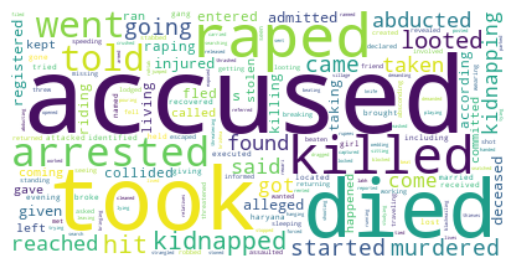

In [61]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [62]:
from collections import Counter

splitted= text.split()
print(Counter(splitted).most_common(5))


[('accused', 111), ('took', 74), ('died', 66), ('raped', 60), ('killed', 47)]


In [63]:
newdata= pd.DataFrame(list(zip(edited_sentence,df['category'])), columns=['complaint','category'])

In [64]:
for i in range(len(newdata)):
    newdata['complaint'][i] = ' '.join(newdata['complaint'][i])


In [65]:
newdata

,complaint,category
0,killed abducted happened playing went,kidnap
1,s killed wedding killed s told eve wedding acc...,murder
2,kidnapping recovered lakh asking conspired pre...,kidnap
3,thanesar married hanged odisha married married...,murder
4,arrested wanted circulated uploaded,theft
...,...,...
437,returned working jammu murdered killing knife ...,murder
438,came riding looted showing fled taking arreste...,theft
439,looted,theft
440,married,rape


In [209]:
lemmatized=[]
for word in newdata['complaint']:
    c=[]
    doc= nlp(word)
    for token in doc:
        c.append(token.lemma_)
    lemmatized.append(c)
print(lemmatized[0])


['kill', 'abducted', 'happen', 'playing', 'go']


In [213]:
newdata['complaint']= lemmatized
for i in range(len(newdata)):
    newdata['complaint'][i] = ' '.join(newdata['complaint'][i])



In [214]:
newdata.head()

,complaint,category
0,kill abducted happen playing go,kidnap
1,s kill wedding kill s tell eve wedding accuse ...,murder
2,kidnap recover lakh ask conspire pressurize,kidnap
3,thanesar marry hang odisha marry married fall,murder
4,arrest want circulate uploaded,theft


In [219]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(newdata['complaint'])
# X = vectorizer.fit_transform(joined)

In [222]:
tf= pd.DataFrame(X[0].T.todense(), index=vectorizer.get_feature_names_out(), columns=["TF-IDF"])
tf= tf.sort_values('TF-IDF', ascending=False)
print(tf.head(25))


              TF-IDF
playing     0.640999
happen      0.453539
abducted    0.432744
kill        0.320654
go          0.305508
abandon     0.000000
pull        0.000000
pretend     0.000000
probe       0.000000
promise     0.000000
protect     0.000000
protest     0.000000
prove       0.000000
question    0.000000
purpose     0.000000
present     0.000000
rai         0.000000
raid        0.000000
raise       0.000000
raj         0.000000
rakka       0.000000
ram         0.000000
pressurize  0.000000
pour        0.000000
prepare     0.000000


In [223]:
import gensim.downloader as api

model = api.load('word2vec-google-news-300')

c:\Users\Garima\AppData\Local\Programs\Python\Python38\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [ ]:
import numpy as np

vectors=[]
for text in df['complaint']:
    if text!=[] :
        temp=[]
        for word in text:
            try:
                temp.append(model[word])
            except:
                pass
        if temp!=[]:
            vectors.append(np.average(np.array(temp), axis=0))
        else:
            vectors.append(np.zeros(300, dtype= np.float64))
    else:
        vectors.append(np.zeros(300, dtype= np.float64))


print(vectors[0])


In [225]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score


In [226]:
X_train, X_val, y_train, y_val = train_test_split(vectors, df['category'], test_size=0.1, random_state=1)


In [227]:
clf= LogisticRegression().fit(X_train, y_train)
predictions= clf.predict(X_val)


In [228]:
accuracy_score(y_val, predictions)

0.4444444444444444

<AxesSubplot: >

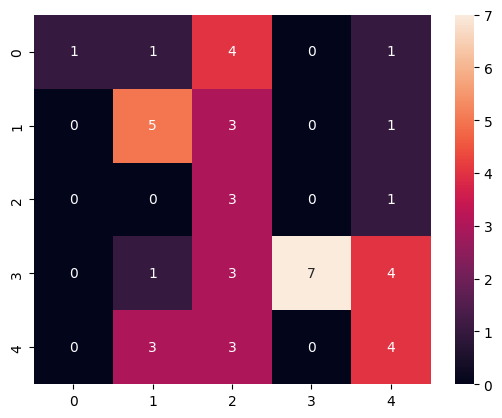

In [229]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_val, predictions), annot=True, fmt='d')

In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load your labeled data into a pandas DataFrame (complaints column contains text data, and label column contains the category)
df = pd.read_csv('translated data.csv')

# Define the categories and their numerical labels
categories = ["rape", "murder", "theft", "kidnap", "accident"]
num_categories = len(categories)
df['label'] = df['category'].astype('category')
df['label'] = df['label'].cat.codes

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df['complaint'], df['label'], test_size=0.2, random_state=42)

# Tokenize the text data and convert to sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)

# Pad sequences to ensure they have the same length
max_sequence_length = max(max(len(seq) for seq in sequences_train), max(len(seq) for seq in sequences_test))
sequences_padded_train = pad_sequences(sequences_train, maxlen=max_sequence_length)
sequences_padded_test = pad_sequences(sequences_test, maxlen=max_sequence_length)

# One-hot encode the labels
y_train_one_hot = to_categorical(y_train, num_classes=num_categories)
y_test_one_hot = to_categorical(y_test, num_classes=num_categories)

# Build the LSTM model
embedding_dim = 100
lstm_units = 256

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(units=lstm_units, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_categories, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 50

model.fit(sequences_padded_train, y_train_one_hot, batch_size=batch_size, epochs=epochs, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(sequences_padded_test, y_test_one_hot)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


In [33]:
test_data= pd.read_csv('translated test.csv')
test_data['label'] = test_data['category'].astype('category')
test_data['label'] = test_data['label'].cat.codes
sequences_test = tokenizer.texts_to_sequences(test_data['complaint'])
sequences_padded_test = pad_sequences(sequences_test, maxlen=max_sequence_length)
y_test_one_hot = to_categorical(test_data['label'], num_classes=num_categories)


# Evaluate the model on the test set
predictions = model.predict(sequences_padded_test)
categories = ["rape", "murder", "theft", "kidnap", "accident"]
predicted_labels = [categories[i] for i in predictions.argmax(axis=1)]

print(predicted_labels)
# print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


3/3 [==============================] - 1s 247ms/step
['rape', 'theft', 'kidnap', 'theft', 'accident', 'accident', 'theft', 'theft', 'murder', 'theft', 'murder', 'accident', 'theft', 'rape', 'rape', 'rape', 'kidnap', 'rape', 'rape', 'accident', 'theft', 'accident', 'accident', 'accident', 'rape', 'rape', 'murder', 'accident', 'kidnap', 'theft', 'kidnap', 'accident', 'theft', 'rape', 'kidnap', 'theft', 'accident', 'kidnap', 'rape', 'accident', 'theft', 'accident', 'accident', 'rape', 'rape', 'theft', 'theft', 'theft', 'theft', 'rape', 'accident', 'rape', 'kidnap', 'murder', 'accident', 'rape', 'accident', 'theft', 'accident', 'theft', 'theft', 'murder', 'murder', 'rape', 'accident', 'rape', 'theft', 'theft', 'accident', 'kidnap', 'murder', 'theft', 'accident', 'rape', 'rape', 'theft', 'murder', 'theft', 'theft', 'murder', 'accident', 'accident', 'murder', 'kidnap', 'rape', 'rape', 'rape', 'accident', 'kidnap', 'kidnap', 'rape', 'theft', 'kidnap', 'rape', 'accident', 'theft']


In [34]:
print(predicted_labels)
print(list(test_data['category']))

['rape', 'theft', 'kidnap', 'theft', 'accident', 'accident', 'theft', 'theft', 'murder', 'theft', 'murder', 'accident', 'theft', 'rape', 'rape', 'rape', 'kidnap', 'rape', 'rape', 'accident', 'theft', 'accident', 'accident', 'accident', 'rape', 'rape', 'murder', 'accident', 'kidnap', 'theft', 'kidnap', 'accident', 'theft', 'rape', 'kidnap', 'theft', 'accident', 'kidnap', 'rape', 'accident', 'theft', 'accident', 'accident', 'rape', 'rape', 'theft', 'theft', 'theft', 'theft', 'rape', 'accident', 'rape', 'kidnap', 'murder', 'accident', 'rape', 'accident', 'theft', 'accident', 'theft', 'theft', 'murder', 'murder', 'rape', 'accident', 'rape', 'theft', 'theft', 'accident', 'kidnap', 'murder', 'theft', 'accident', 'rape', 'rape', 'theft', 'murder', 'theft', 'theft', 'murder', 'accident', 'accident', 'murder', 'kidnap', 'rape', 'rape', 'rape', 'accident', 'kidnap', 'kidnap', 'rape', 'theft', 'kidnap', 'rape', 'accident', 'theft']
['theft', 'murder', 'murder', 'murder', 'theft', 'theft', 'rape',

In [35]:
# import accurcay_score
from sklearn.metrics import accuracy_score
accuracy_score(test_data['category'], predicted_labels)

0.10416666666666667

In [68]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load your labeled data into a pandas DataFrame (complaints column contains text data, and label column contains the category)
df = newdata.copy()
df['category']= df['category'].astype('category')
df['category'] = df['category'].cat.codes
df

,complaint,category
0,killed abducted happened playing went,1
1,s killed wedding killed s told eve wedding acc...,2
2,kidnapping recovered lakh asking conspired pre...,1
3,thanesar married hanged odisha married married...,2
4,arrested wanted circulated uploaded,4
...,...,...
437,returned working jammu murdered killing knife ...,2
438,came riding looted showing fled taking arreste...,4
439,looted,4
440,married,3


In [69]:
# Preprocess the text data (remove stopwords, perform stemming/lemmatization, etc.)
# Your preprocessing code goes here...

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df['complaint'], df['category'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the max_features parameter based on your dataset size
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

# XGBoost Classifier
model = xgb.XGBClassifier()
model.fit(tfidf_train, y_train)

# Model Evaluation
y_pred = model.predict(tfidf_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Prediction on New Data
new_texts = ["A person was murdered.", "My car was hit by another car."]
tfidf_new = tfidf_vectorizer.transform(new_texts)
new_predictions = model.predict(tfidf_new)

print(new_predictions)


Accuracy: 0.5843
Precision: 0.5999
Recall: 0.5843
F1-score: 0.5782
[1 0]


In [73]:
test_data= pd.read_csv('translated test.csv')
test_data['category']= test_data['category'].astype('category')
test_data['category']= test_data['category'].cat.codes
test_new = tfidf_vectorizer.transform(test_data['complaint'])
test_predictions= model.predict(test_new)
print(accuracy_score(test_data['category'], test_predictions))



0.5833333333333334


In [78]:
print(test_predictions)
list(test_data['category'])

[4 1 0 1 4 4 3 2 4 0 1 1 2 1 0 4 1 0 2 1 1 4 4 4 0 0 2 0 3 4 2 0 2 0 3 2 4
 3 0 0 2 4 4 0 0 2 1 2 0 0 3 0 2 1 4 0 1 2 4 4 1 0 2 0 3 0 4 4 4 4 4 3 4 4
 0 2 1 4 2 3 4 4 1 4 4 0 0 1 1 4 0 1 3 0 4 2]


[4,
 2,
 2,
 2,
 4,
 4,
 3,
 2,
 2,
 2,
 1,
 4,
 2,
 0,
 0,
 4,
 1,
 0,
 0,
 1,
 2,
 4,
 4,
 4,
 0,
 4,
 1,
 2,
 3,
 2,
 3,
 4,
 2,
 4,
 3,
 2,
 4,
 3,
 4,
 3,
 2,
 4,
 4,
 0,
 0,
 2,
 1,
 2,
 2,
 0,
 4,
 0,
 2,
 1,
 4,
 0,
 4,
 2,
 4,
 2,
 2,
 2,
 2,
 0,
 4,
 0,
 4,
 4,
 4,
 3,
 3,
 2,
 2,
 0,
 0,
 0,
 1,
 4,
 2,
 4,
 4,
 4,
 4,
 3,
 0,
 0,
 2,
 2,
 1,
 1,
 0,
 2,
 1,
 0,
 4,
 2]